In [1]:
import sys
sys.path.append('../')

In [2]:
from thesaurus_parsing.thesaurus_parser import ThesaurusParser
from syntax_trees.syntax_tree import SyntaxTree
from file_preprocessing.file_preprocessing import ParsedSentence
from deeppavlov import build_model, configs
from nltk import WordPunctTokenizer, MWETokenizer
from queue import Queue
import pydot

In [3]:
from IPython.display import Image, display

In [4]:
thesaurus = ThesaurusParser("../data/RuThes", need_closure=False, verbose=True)

In [5]:
def get_deeppavlov_info(tagged_sentence, deeppavlov_lemma):
    sentences = [tagged_sentence]
    morpho_tokens = deeppavlov_lemma(sentences)[0].split('\n')
    splitted_info = [x.split('\t') for x in morpho_tokens]
    lemmatized_tokens = [splitted[2] for splitted in splitted_info if len(splitted) == 10]
    pos = [splitted[3] for splitted in splitted_info if len(splitted) == 10]
    return lemmatized_tokens, pos

Надо написать генерацию синтаксического дерева и паттернов просто из предложения и проверить, что для предложения

`Такие собаки, как таксы и ротвейлеры, особенно популярны в Новой Гвинее`

паттерн гиперонимии будет построен корректный

In [6]:
sentence = 'Такие собаки, как таксы, ротвейлеры и бульдоги, особенно популярны в Новой Гвинее'

In [7]:
deeppavlov_lemma = build_model(
    configs.morpho_tagger.BERT.morpho_ru_syntagrus_bert,
    download=False
)

[nltk_data] Downloading package punkt to /home/loginov-ra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/loginov-
[nltk_data]     ra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /home/loginov-
[nltk_data]     ra/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to /home/loginov-
[nltk_data]     ra/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


2020-04-18 01:25:33.277 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /home/loginov-ra/.deeppavlov/models/morpho_ru_syntagrus/tag.dict]


Using TensorFlow backend.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use standard file APIs to check for files with this prefix.


2020-04-18 01:25:55.831 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /home/loginov-ra/.deeppavlov/models/morpho_ru_syntagrus/model]



INFO:tensorflow:Restoring parameters from /home/loginov-ra/.deeppavlov/models/morpho_ru_syntagrus/model


2020-04-18 01:25:57.139 WARNING in 'deeppavlov.core.models.serializable'['serializable'] at line 52: No load path is set for UDPymorphyLemmatizer!


In [8]:
deeppavlov_syntax = build_model(
    configs.syntax.syntax_ru_syntagrus_bert,
    download=False
)

2020-04-18 01:25:57.598 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /home/loginov-ra/.deeppavlov/models/syntax_ru_syntagrus/deps.dict]


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-04-18 01:26:23.268 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /home/loginov-ra/.deeppavlov/models/syntax_ru_syntagrus/model_joint]


INFO:tensorflow:Restoring parameters from /home/loginov-ra/.deeppavlov/models/syntax_ru_syntagrus/model_joint


In [9]:
for parsed in deeppavlov_lemma([sentence]):
    print(parsed)

1	Такие	такой	DET	_	Case=Nom|Number=Plur	_	_	_	_
2	собаки	собака	NOUN	_	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	_	_	_	_
3	,	,	PUNCT	_	_	_	_	_	_
4	как	как	SCONJ	_	_	_	_	_	_
5	таксы	такса	NOUN	_	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	_	_	_	_
6	,	,	PUNCT	_	_	_	_	_	_
7	ротвейлеры	ротвейлер	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur	_	_	_	_
8	и	и	CCONJ	_	_	_	_	_	_
9	бульдоги	бульдог	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur	_	_	_	_
10	,	,	PUNCT	_	_	_	_	_	_
11	особенно	особенно	ADV	_	Degree=Pos	_	_	_	_
12	популярны	популярный	ADJ	_	Degree=Pos|Number=Plur|Variant=Short	_	_	_	_
13	в	в	ADP	_	_	_	_	_	_
14	Новой	новый	ADJ	_	Case=Loc|Degree=Pos|Gender=Fem|Number=Sing	_	_	_	_
15	Гвинее	гвинея	PROPN	_	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	_	_	_	_



In [10]:
lemmatized, pos = get_deeppavlov_info(sentence, deeppavlov_lemma)

In [11]:
lemmatized

['такой',
 'собака',
 ',',
 'как',
 'такса',
 ',',
 'ротвейлер',
 'и',
 'бульдог',
 ',',
 'особенно',
 'популярный',
 'в',
 'новый',
 'гвинея']

In [12]:
parsed = ParsedSentence(lemmatized, lemmatized, thesaurus, deeppavlov_lemma=lemmatized,
                        deeppavlov_pos=pos, syntax_model=deeppavlov_syntax)

In [13]:
parsed.syntax_tree.compress_conj_edges()

In [14]:
parsed.to_json()['syntax']

['0;1;det;такой',
 '1;-1;root;собака',
 '2;4;punct;,',
 '3;4;mark;как',
 '4;0;obl;такса',
 '5;6;punct;,',
 '6;4;conj;ротвейлер',
 '7;8;cc;и',
 '8;4;conj;бульдог',
 '9;11;punct;,',
 '10;11;obl;особенно',
 '11;8;amod;популярный',
 '12;13;case;в',
 '13;14;amod;новый',
 '14;11;obl;гвинея']

In [15]:
parsed.syntax_tree.get_shortest_path(6, 1)

[6, 0, 1]

In [16]:
';'.join(parsed.syntax_tree.get_syntax_pattern(4, 1, pos, lemmatized))

'как:SCONJ:mark:NOUN:{};{}:NOUN:obl:DET:такой;такой:DET:det:NOUN:{}'

In [17]:
';'.join(parsed.syntax_tree.get_syntax_pattern(6, 1, pos, lemmatized))

'{}:NOUN:obl:DET:такой;такой:DET:det:NOUN:{}'

Видно, что на данный момент этот `conj` не обрабатывается и в паттерн про ротвейлера влезает такса

Напишем код для визуализации дерева

In [20]:
def visualize_tree(syntax_tree, pos, lemma):
    G = pydot.Dot(graph_type='digraph')
    names = [node.token + " - " + pos[i] for i, node in enumerate(syntax_tree.nodes)]
    for i, node in enumerate(syntax_tree.nodes):
        graph_node = pydot.Node(names[i])
        G.add_node(graph_node)
        for child_idx in syntax_tree.children[node.idx]:
            children_type = syntax_tree.children_types[node.idx][child_idx]
            children_role = syntax_tree.children_roles[node.idx][child_idx]
            if children_type == 'usual':
                edge = pydot.Edge(names[node.idx], names[child_idx],
                                  label = children_role,
                                  fontcolor='gray')
                G.add_edge(edge)
            elif children_type == 'conj':
                edge = pydot.Edge(names[node.idx], names[child_idx],
                                  label = children_role,
                                  fontcolor='gray', style='dashed')
                edge.set_color('blue')
                G.add_edge(edge)
    im = Image(G.create_png())
    display(im)

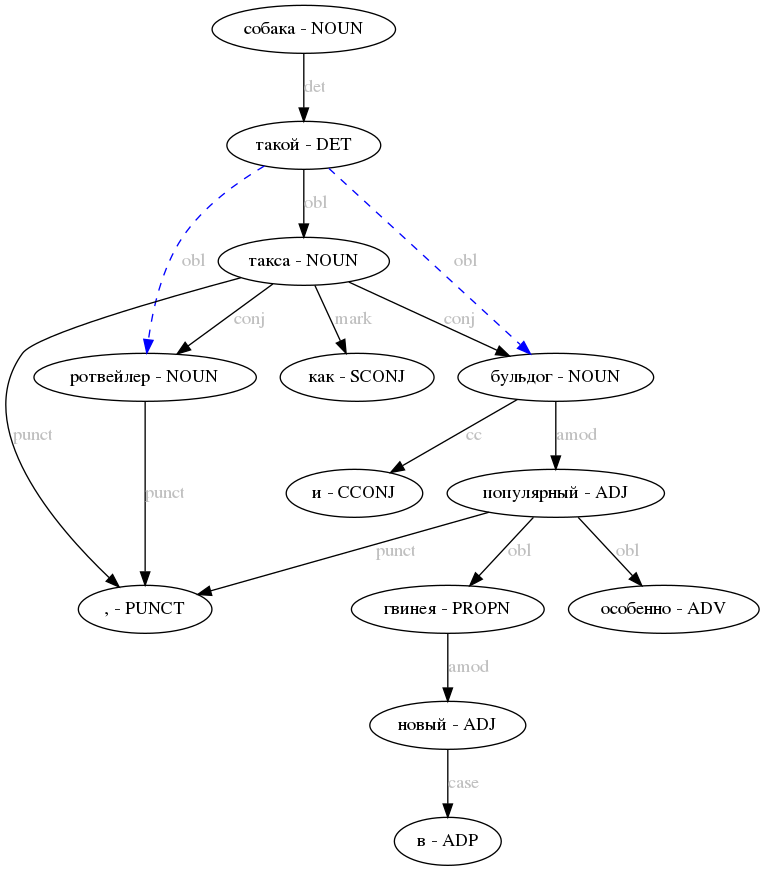

In [21]:
visualize_tree(parsed.syntax_tree, pos, lemmatized)